In [ ]:
!pip install -U fastai

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from fastai.vision.all import *

In [3]:
import fastai
print(fastai.__version__)

2.8.1


In [4]:
from  google.colab import drive

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
root_path = 'gdrive/My Drive/Deep_Learning/'

In [7]:
(Path(root_path)/'Vehicle').mkdir(parents=True, exist_ok=True)

In [8]:
proj_path = 'gdrive/My Drive/Deep_Learning/Vehicle'

In [9]:
folders =['car','bike','motorcycle','train','tractor','truck','bus','airplane','helicopter','blimp','boat','balloon','ship','submarine','kayak']

In [10]:
for folder in folders:
    folder_path = Path(proj_path) / folder
    folder_path.mkdir(parents=True, exist_ok=True)

In [11]:
p_path = Path(proj_path)

In [12]:
get_image_files(p_path)

(#1254) [Path('gdrive/My Drive/Deep_Learning/Vehicle/car/vintage-car-parked-on-scenic-country-road-old-retro-car-photo.jpg'),Path('gdrive/My Drive/Deep_Learning/Vehicle/car/12-v-licensed-chevrolet-kids-auto-car-pink.jpg'),Path('gdrive/My Drive/Deep_Learning/Vehicle/car/0c2f643f5fbc4be58473d185411c1f16.jpg'),Path('gdrive/My Drive/Deep_Learning/Vehicle/car/bugatti-centodieci.jpg'),Path('gdrive/My Drive/Deep_Learning/Vehicle/car/pexels-photo-1545743.jpg'),Path('gdrive/My Drive/Deep_Learning/Vehicle/car/2024-corvette-north-texas-auto-show-1.jpg'),Path('gdrive/My Drive/Deep_Learning/Vehicle/car/61Rx9tHudUL.jpg'),Path('gdrive/My Drive/Deep_Learning/Vehicle/car/db3b67e8-41e7-423b-8e69-40c22792cc95.jpg'),Path('gdrive/My Drive/Deep_Learning/Vehicle/car/maxresdefault.jpg'),Path('gdrive/My Drive/Deep_Learning/Vehicle/car/cover-4.jpg'),Path('gdrive/My Drive/Deep_Learning/Vehicle/car/f676cf91-40d6-3481-b179-a1da52c85058.png'),Path('gdrive/My Drive/Deep_Learning/Vehicle/car/lf-zc-concept.jpg'),Path(

In [13]:
np.random.seed(42)
dls = ImageDataLoaders.from_folder(
    p_path,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(),
    get_items=get_image_files,
    num_workers=4
)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


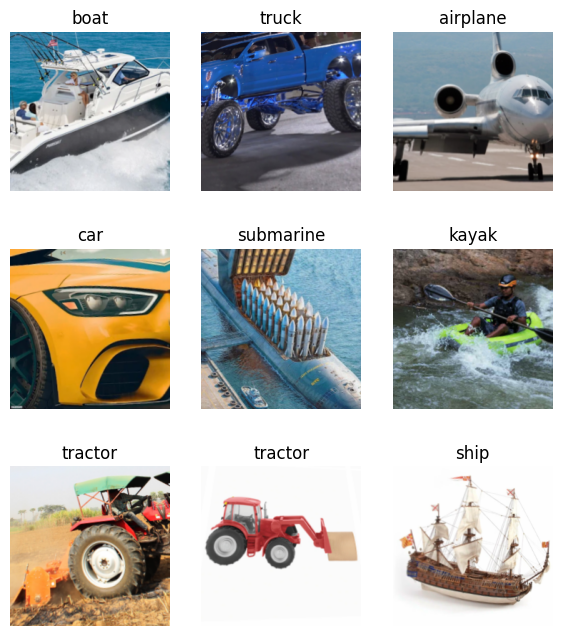

In [14]:
set_seed(42)
dls.show_batch(nrows=3, figsize=(7, 8))

In [15]:
print("Classes:", dls.vocab)
print("Number of classes:", dls.c)
print("Training items:", len(dls.train.dataset))
print("Validation items:", len(dls.valid.dataset))

Classes: ['airplane', 'balloon', 'bike', 'blimp', 'boat', 'bus', 'car', 'helicopter', 'kayak', 'motorcycle', 'ship', 'submarine', 'tractor', 'train', 'truck']
Number of classes: 15
Training items: 1004
Validation items: 250


In [16]:
learn = vision_learner(dls, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 140MB/s]


In [17]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.656783,1.596520,0.512000,08:02
1,2.331420,0.331462,0.084000,07:18
2,1.476041,0.236007,0.064000,07:15
3,1.026030,0.209811,0.056000,07:20
4,0.759936,0.205557,0.056000,07:22
5,0.570622,0.202895,0.068000,07:14
6,0.463923,0.197840,0.056000,07:20
7,0.375687,0.198971,0.064000,07:06


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

In [19]:
save_path = learn.path / learn.model_dir / 'model1_34.pth'
print(save_path)

gdrive/My Drive/Deep_Learning/Vehicle/models/model1_34.pth


In [20]:
learn.unfreeze()

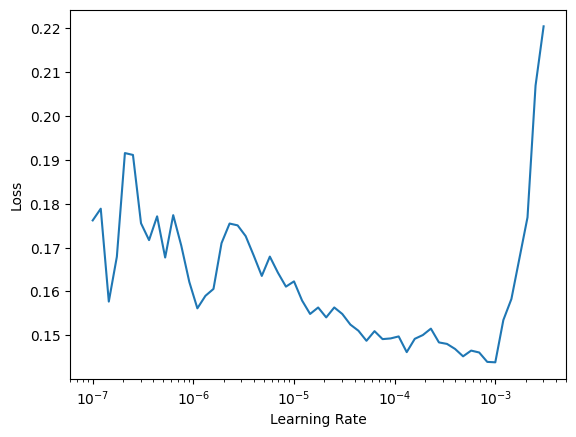

In [22]:
learn.recorder.plot_lr_find()

In [25]:
learn.fit_one_cycle(3, lr_max=slice(1e-5, 1e-3), wd=0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.163048,0.244491,0.072000,10:31
1,0.138960,0.179053,0.056000,10:39
2,0.117702,0.166082,0.048000,10:40


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

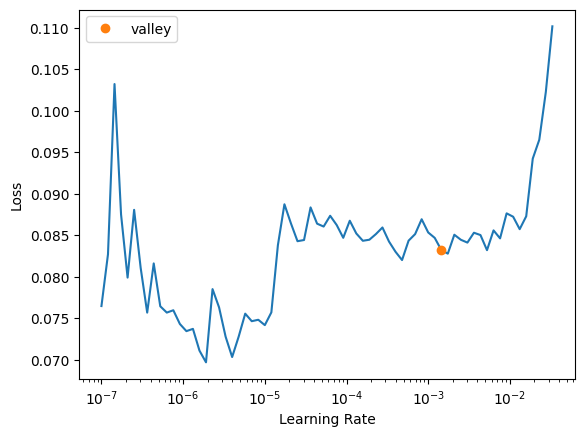

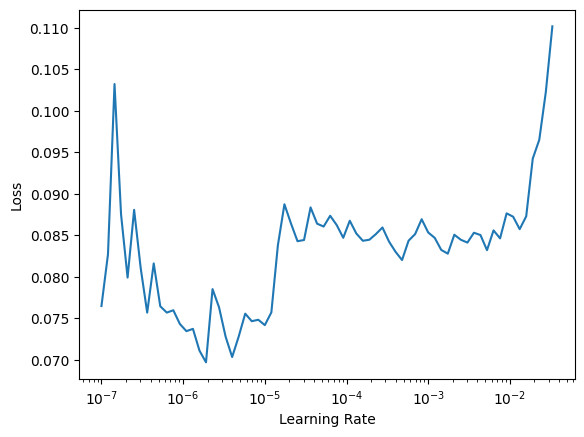

In [27]:
learn.freeze()
learn.lr_find()
learn.recorder.plot_lr_find()

In [28]:
learn.save('model2_34')

Path('gdrive/My Drive/Deep_Learning/Vehicle/models/model2_34.pth')

In [29]:
learn.load('model2_34')
interp = ClassificationInterpretation.from_learner(learn)

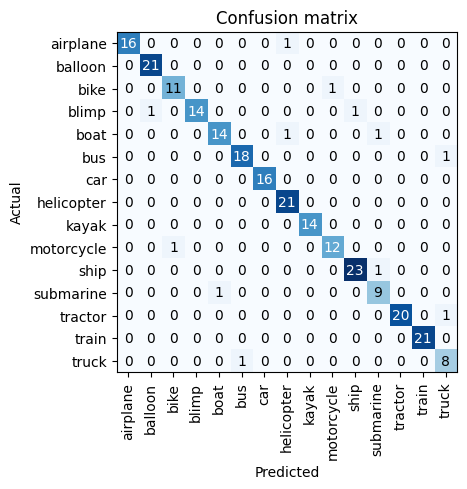

In [30]:
interp.plot_confusion_matrix()

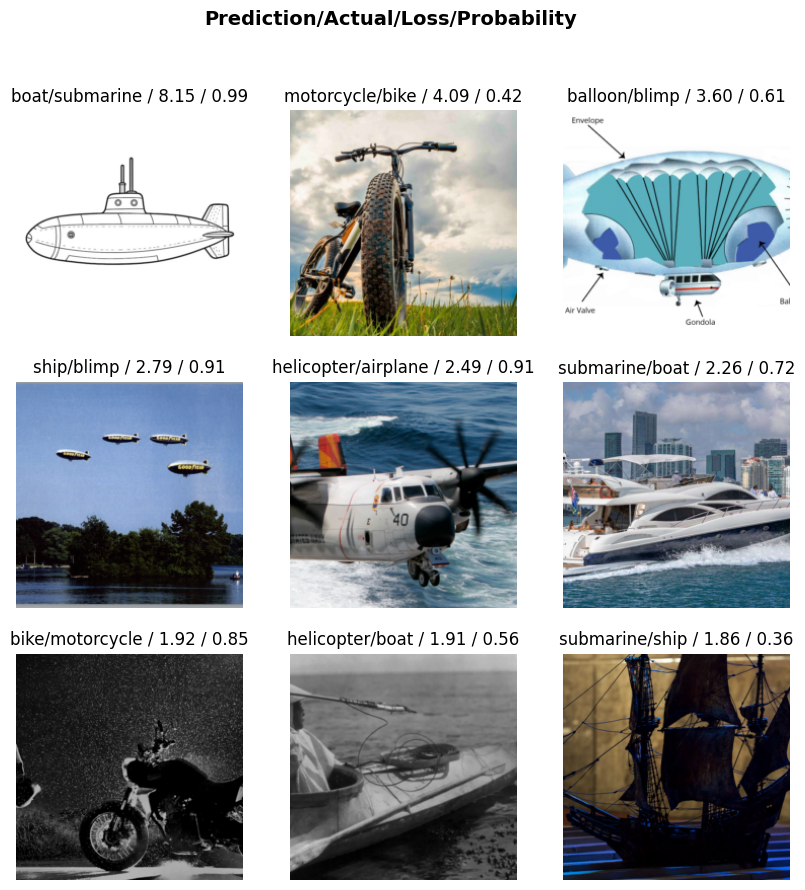

In [31]:
interp.plot_top_losses(9, figsize=(10,10))

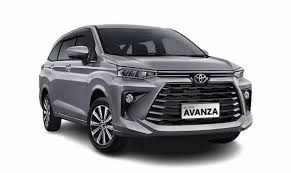

In [38]:
img_car = PILImage.create(Path(root_path)/'valid'/'carValid.jpeg')
img_car

In [39]:
pred_class,pred_idx,outputs = learn.predict(img_car)
pred_class

'car'

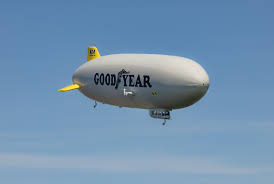

In [40]:
img_blimp = PILImage.create(Path(root_path)/'valid'/'blimpValid.jpeg')
img_blimp

In [41]:
pred_class,pred_idx,outputs = learn.predict(img_blimp)
pred_class

'blimp'